In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 60.9 MB/s eta 0:00:00


In [ ]:
!pip install geopandas


In [ ]:
from osgeo import gdal

In [ ]:
from osgeo import gdal
import numpy as np


#1. R FActor FROM RAINFALL

# Define the function to calculate the R factor from rainfall
# This is a placeholder function, and you will need to replace it with the actual formula
def calculate_r_factor(rainfall_array):
    # Apply the R factor formula here
    # For example, R = (E * I30) / A, where E is the total kinetic energy of the storm,
    # I30 is the maximum 30-minute intensity, and A is the area (if needed).
    # This is just a conceptual representation and will differ based on your specific formula.
    r_factor_array = (rainfall_array * 0.363)+79 # Replace with actual calculation
    return r_factor_array
    print(r_factor_array.shape())

# Function to read a raster and convert it to an array
def raster_to_array(raster_path):
    raster = gdal.Open(raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array

# Function to write an array to a raster, using a reference raster for georeferencing
def array_to_raster(array, reference_raster_path, output_raster_path):
    reference_raster = gdal.Open(reference_raster_path)
    driver = gdal.GetDriverByName('GTiff')
    out_raster = driver.Create(output_raster_path, reference_raster.RasterXSize, reference_raster.RasterYSize, 1, gdal.GDT_Float32)
    out_raster.SetGeoTransform(reference_raster.GetGeoTransform())
    out_raster.SetProjection(reference_raster.GetProjection())
    out_band = out_raster.GetRasterBand(1)
    out_band.WriteArray(array)
    out_band.FlushCache()
    out_raster = None

# Load your CHIRPS rainfall raster image
rainfall_raster_path = r'/content/gdrive/MyDrive/Rusle/Rusle project/All_factor/Input/Chirps_Rainfall_Data.tif'
rainfall_array = raster_to_array(rainfall_raster_path)

# Calculate the R factor from the rainfall data
r_factor_array = calculate_r_factor(rainfall_array)

# Save the R factor as a new raster image
output_raster_path = r'/content/gdrive/MyDrive/rusle1/R_factor1.tif'
array_to_raster(r_factor_array, rainfall_raster_path, output_raster_path)

print("R factor raster created successfully.")


R factor raster created successfully.


In [ ]:
from osgeo import gdal
import numpy as np
# 2. K FACTOR FROM SOIL DATA PROVIDED BY USGS
# Function to read a raster and convert it to an array
def raster_to_array(raster_path):
    raster = gdal.Open(raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array

# Function to write an array to a raster, using a reference raster for georeferencing
def array_to_raster(array, reference_raster_path, output_raster_path):
    reference_raster = gdal.Open(reference_raster_path)
    driver = gdal.GetDriverByName('GTiff')
    out_raster = driver.Create(output_raster_path, reference_raster.RasterXSize, reference_raster.RasterYSize, 1, gdal.GDT_Float32)
    out_raster.SetGeoTransform(reference_raster.GetGeoTransform())
    out_raster.SetProjection(reference_raster.GetProjection())
    out_band = out_raster.GetRasterBand(1)
    out_band.WriteArray(array)
    out_band.FlushCache()
    out_raster = None

# Calculate K factor based on the soil data and the provided conditions
def calculate_k_factor(soil_array):
    k_factor_array = np.zeros_like(soil_array, dtype=float)

    # Nested conditions are used to assign K factor values based on soil classes
    k_factor_array[soil_array > 11] = 0.0053
    k_factor_array[(soil_array > 10) & (soil_array <= 11)] = 0.0170
    k_factor_array[(soil_array > 9) & (soil_array <= 10)] = 0.045
    k_factor_array[(soil_array > 8) & (soil_array <= 9)] = 0.050
    k_factor_array[(soil_array > 7) & (soil_array <= 8)] = 0.0499
    k_factor_array[(soil_array > 6) & (soil_array <= 7)] = 0.0394
    k_factor_array[(soil_array > 5) & (soil_array <= 6)] = 0.0264
    k_factor_array[(soil_array > 4) & (soil_array <= 5)] = 0.0423
    k_factor_array[(soil_array > 3) & (soil_array <= 4)] = 0.0394
    k_factor_array[(soil_array > 2) & (soil_array <= 3)] = 0.036
    k_factor_array[(soil_array > 1) & (soil_array <= 2)] = 0.0341
    k_factor_array[(soil_array > 0) & (soil_array <= 1)] = 0.0288
    k_factor_array[soil_array <= 0] = 0  # This assumes that a value of 0 means no soil data or not applicable

    return k_factor_array

# Load your soil raster image
soil_raster_path = r'/content/gdrive/MyDrive/Rusle/Rusle project/All_factor/Input/SOIl_DATA_USDA.tif'
soil_array = raster_to_array(soil_raster_path)

# Calculate the K factor from the soil data
k_factor_array = calculate_k_factor(soil_array)

# Save the K factor as a new raster image
output_raster_path = r'/content/gdrive/MyDrive/rusle1/K_factor1.tif'
array_to_raster(k_factor_array, soil_raster_path, output_raster_path)

print("K factor raster created successfully.")


K factor raster created successfully.


In [ ]:

#3.LS FACTOR
import numpy as np
from osgeo import gdal

# Function to read a raster and convert it to an array
def raster_to_array(raster_path):
    raster = gdal.Open(raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array

# Function to write an array to a raster, using a reference raster for georeferencing
def array_to_raster(array, reference_raster_path, output_raster_path):
    reference_raster = gdal.Open(reference_raster_path)
    driver = gdal.GetDriverByName('GTiff')
    out_raster =driver.Create(output_raster_path, reference_raster.RasterXSize, reference_raster.RasterYSize, 1, gdal.GDT_Float32)
    out_raster.SetGeoTransform(reference_raster.GetGeoTransform())
    out_raster.SetProjection(reference_raster.GetProjection())
    out_band = out_raster.GetRasterBand(1)
    out_band.WriteArray(array)
    out_band.FlushCache()
    out_raster = None

# Calculate the slope in percentage from the elevation data
def calculate_slope_percentage(elevation_array, cell_size):
    # Calculate slope in radians
    x, y = np.gradient(elevation_array, cell_size)
    slope_radians = np.arctan(np.sqrt(x**2 + y**2))
    # Convert to slope percentage
    slope_percentage = np.tan(slope_radians) * 100
    return slope_percentage

# Calculate the LS factor from the slope percentage
def calculate_ls_factor(slope_percentage):
    LS4 = np.sqrt(500 / 100)
    LS3 = slope_percentage * 0.53
    LS2 = slope_percentage * (slope_percentage * 0.076)
    LS1 = LS3 + LS2 + 0.76
    LS = LS1 * LS4
    return LS

# Load your SRTM elevation raster image
elevation_raster_path = r'/content/gdrive/MyDrive/Rusle/Rusle project/All_factor/Input/Digital_Elevation_Model_Data.tif'
elevation_array = raster_to_array(elevation_raster_path)

# The cell size (resolution) of your SRTM data, in meters
cell_size = 100 # SRTM data is commonly available at 30m resolution

# Calculate the slope percentage from the elevation data
slope_percentage_array = calculate_slope_percentage(elevation_array, cell_size)

# Calculate the LS factor from the slope percentage
ls_factor_array = calculate_ls_factor(slope_percentage_array)

# Save the LS factor as a new raster image
output_raster_path = r'/content/gdrive/MyDrive/rusle1/LS_factor1.tif'
array_to_raster(ls_factor_array, elevation_raster_path, output_raster_path)

print("LS factor raster created successfully.")


LS factor raster created successfully.


In [ ]:
#4. C FACTOR

import numpy as np
from osgeo import gdal

# Function to read a raster and convert it to an array
def raster_to_array(raster_path):
    raster = gdal.Open(raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array

# Function to write an array to a raster, using a reference raster for georeferencing
def array_to_raster(array, reference_raster_path, output_raster_path):
    reference_raster = gdal.Open(reference_raster_path)
    driver = gdal.GetDriverByName('GTiff')
    out_raster = driver.Create(output_raster_path, reference_raster.RasterXSize, reference_raster.RasterYSize, 1, gdal.GDT_Float32)
    out_raster.SetGeoTransform(reference_raster.GetGeoTransform())
    out_raster.SetProjection(reference_raster.GetProjection())
    out_band = out_raster.GetRasterBand(1)
    out_band.WriteArray(array)
    out_band.FlushCache()
    out_raster = None

# Calculate the C factor from the NDVI data
def calculate_c_factor(ndvi_array):
    # Define alpha and beta values
    alpha = -2
    beta = 1

    # Apply the equation to calculate C3
    C1 = alpha * ndvi_array
    one_array = np.ones_like(ndvi_array)
    C2 = one_array - ndvi_array
    C3 = C1 / C2

    # Calculate C4
    C4 = np.exp(C3)

    # Handle NaN values
    C4[np.isnan(C4)] = 0

    min_x = np.min(C4)
    max_x = np.max(C4)

    # Perform min-max normalization only on valid values
    C_factor = np.zeros_like(C4)
    valid_mask = C4 != 0
    C_factor[valid_mask] = (C4[valid_mask] - min_x) / (max_x - min_x)

    return C_factor

# Load your NDVI raster image
ndvi_raster_path = r'/content/gdrive/MyDrive/Rusle/Rusle project/All_factor/Input/NDVI_Data.tif'
ndvi_array = raster_to_array(ndvi_raster_path)

# Calculate the C factor from the NDVI data
c_factor_array = calculate_c_factor(ndvi_array)

# Save the C factor as a new raster image
output_raster_path = r'/content/gdrive/MyDrive/rusle1/C_factor1.tif'
array_to_raster(c_factor_array, ndvi_raster_path, output_raster_path)

print("C factor raster created successfully.")


C factor raster created successfully.


In [ ]:
#For the calculation of P FACTOR WE REQUIRE SLOPE IN PERCENT
#CONVERTING ELEVATION TO SLOPE PERCENTAGE
import rasterio
from rasterio.transform import from_origin
import numpy as np

# Replace 'path/to/your/elevation.tif' with the actual path to your elevation TIFF file
elevation_path = r'/content/gdrive/MyDrive/Rusle/Rusle project/All_factor/Input/Digital_Elevation_Model_Data.tif'

# Read elevation raster with rasterio
with rasterio.open(elevation_path) as src:
    elevation_array = src.read(1)

# Calculate slope in percentage using numpy
slope_array_percent = np.tan(np.arctan(np.gradient(elevation_array)[0])) * 100

# Define the output path for the slope raster
output_path = r'/content/gdrive/MyDrive/rusle1/SLOPE_In_PERCENTAGE.tif'

# Write the slope array to a new GeoTIFF file using rasterio
with rasterio.open(
    output_path,
    'w',
    driver='GTiff',
    height=slope_array_percent.shape[0],
    width=slope_array_percent.shape[1],
    count=1,
    dtype='float32',
    crs=src.crs,
    transform=src.transform,
) as dst:
    dst.write(slope_array_percent, 1)

print(f"Slope percentage calculation completed. Output saved to: {output_path}")


Slope percentage calculation completed. Output saved to: /content/gdrive/MyDrive/rusle1/SLOPE_In_PERCENTAGE.tif


In [ ]:

#5.P_FACTOR
import numpy as np
from osgeo import gdal

# Function to read a raster and convert it to an array
def raster_to_array(raster_path):
    raster = gdal.Open(raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array

# Load LULC raster image
lulc_raster_path = r'/content/gdrive/MyDrive/Rusle/Rusle project/All_factor/Input/Land_Cover_Type_Data_LULC.tif'  # Replace with your LULC raster path
lulc_array = raster_to_array(lulc_raster_path)
lulc_array = np.resize(lulc_array, np.shape(lulc_array))



# Load slope raster image
slope_raster_path = r'/content/gdrive/MyDrive/rusle1/SLOPE_In_PERCENTAGE.tif'  # Replace with your slope raster path
slope_array = raster_to_array(slope_raster_path)
slope_array = np.resize(slope_array,np.shape(lulc_array))

# Create P Factor map using an expression
P_factor = np.where(
    (lulc_array < 11), 0.8,
    np.where(lulc_array == 11, 1,
        np.where(lulc_array == 13, 1,
            np.where(lulc_array > 14, 1,
                np.where((slope_array < 2) & ((lulc_array == 12) | (lulc_array == 14)), 0.6,
                    np.where((slope_array < 5) & ((lulc_array == 12) | (lulc_array == 14)), 0.5,
                        np.where((slope_array < 8) & ((lulc_array == 12) | (lulc_array == 14)), 0.5,
                            np.where((slope_array < 12) & ((lulc_array == 12) | (lulc_array == 14)), 0.6,
                                np.where((slope_array < 16) & ((lulc_array == 12) | (lulc_array == 14)), 0.7,
                                    np.where((slope_array < 20) & ((lulc_array == 12) | (lulc_array == 14)), 0.8,
                                        np.where((slope_array > 20) & ((lulc_array == 12) | (lulc_array == 14)), 0.9, 1)
                                    )
                                )
                            )
                        )
                    )
                )
            )
        )
    )
)

# Save the P factor as a new raster image
output_raster_path = r'/content/gdrive/MyDrive/rusle1/P_FACTOR.tif'

# Use one of the rasters as a reference for georeferencing (in this case, using LULC raster)
reference_raster_path = lulc_raster_path

# Load reference raster for georeferencing
reference_raster = gdal.Open(reference_raster_path)
driver = gdal.GetDriverByName('GTiff')
out_raster = driver.Create(output_raster_path, reference_raster.RasterXSize, reference_raster.RasterYSize, 1, gdal.GDT_Float32)
out_raster.SetGeoTransform(reference_raster.GetGeoTransform())
out_raster.SetProjection(reference_raster.GetProjection())

# Write P factor array to the raster
out_band = out_raster.GetRasterBand(1)
out_band.WriteArray(P_factor)
out_band.FlushCache()
out_raster = None

print("P factor raster created successfully.")

P factor raster created successfully.


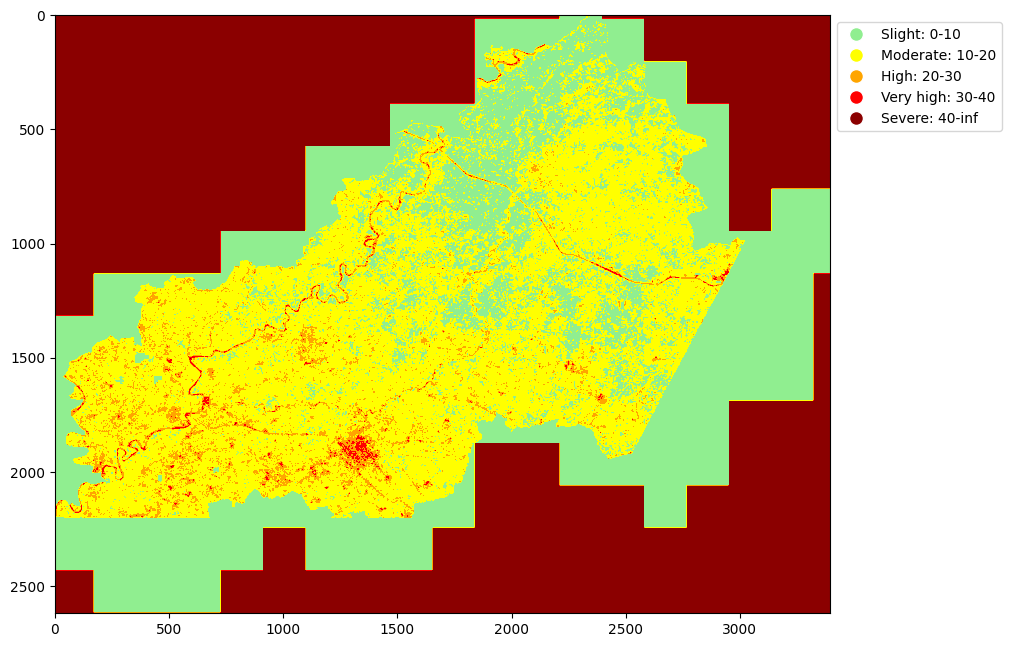

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from matplotlib.colors import ListedColormap

# Specify the path to your input raster file
input_raster_path = r'/content/gdrive/MyDrive/rusle1/RUSLE.tif'

# Open the raster file
with rasterio.open(input_raster_path) as src:
    # Read the raster data
    data = src.read(1, masked=True)  # Assuming the data is in the first band

    # Define the categories and corresponding color map
    categories = ['Slight', 'Moderate', 'High', 'Very high', 'Severe']
    color_values = [0, 10, 20, 30, 40, np.inf]
    colors = ['lightgreen', 'yellow', 'orange', 'red', 'darkred']

    # Create a colormap
    cmap = ListedColormap(colors)

    # Create a legend
    legend_labels = [f'{categories[i]}: {color_values[i]}-{color_values[i+1]}' for i in range(len(categories))]
    legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) for i in range(len(colors))]

    # Categorize the data
    category_data = np.digitize(data, bins=color_values, right=True)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot the categorized data
    im = ax.imshow(category_data, cmap=cmap)

    # Add the legend
    ax.legend(handles=legend, loc='upper left', bbox_to_anchor=(1, 1))

    # Show the plot
    plt.show()
    output_image_path = r'/content/gdrive/MyDrive/rusle1/final_rusle.tif'
    plt.savefig(output_image_path, bbox_inches='tight', pad_inches=0.1)



In [ ]:
from osgeo import gdal

In [ ]:
# all the raster images have different minimum and maximum values therefore we need to resample or make same size before we go FINAL RUSLE multiplication

import numpy as np
import rasterio
from rasterio.transform import from_origin
from rasterio.enums import Resampling
from rasterio import warp

def resample_tiff(input_path, output_path, reference_tiff):
    with rasterio.open(reference_tiff) as ref_ds:
        ref_data = ref_ds.read(1)
        ref_transform = ref_ds.transform
        ref_crs = ref_ds.crs
        ref_height, ref_width = ref_data.shape

    with rasterio.open(input_path) as ds:
        data = ds.read(1)
        resampled_data = np.empty_like(ref_data)

        rasterio.warp.reproject(
            source=data,
            destination=resampled_data,
            src_transform=ds.transform,
            src_crs=ds.crs,
            dst_transform=ref_transform,
            dst_crs=ref_crs,
            resampling=Resampling.nearest  # or use Resampling.bilinear for a smoother result
        )

        profile = ds.profile  # Accessing properties before closing the dataset

    profile.update({
        'transform': ref_transform,
        'crs': ref_crs,
        'width': ref_width,
        'height': ref_height
    })

    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(resampled_data, 1)

# Example usage
reference_file = r'/content/gdrive/MyDrive/rusle1/LS_factor1.tif'


#input
path_r = r'/content/gdrive/MyDrive/rusle1/R_factor1.tif'
path_k = r'/content/gdrive/MyDrive/rusle1/K_factor1.tif'
path_ls = r'/content/gdrive/MyDrive/rusle1/LS_factor1.tif'
path_c = r'/content/gdrive/MyDrive/rusle1/C_factor1.tif'
path_p = r'/content/gdrive/MyDrive/rusle1/P_FACTOR.tif'

#output

o_path_r = r'/content/gdrive/MyDrive/rusle1/R_FACTOR_RES.tif'
o_path_k = r'/content/gdrive/MyDrive/rusle1/K_FACTOR_RES.tif'
o_path_ls = r'/content/gdrive/MyDrive/rusle1/LS_FACTOR_RES.tif'
o_path_c = r'/content/gdrive/MyDrive/rusle1/C_FACTOR_RES.tif'
o_path_p = r'/content/gdrive/MyDrive/rusle1/P_FACTOR_RES.tif'







resample_tiff(path_r, o_path_r, reference_file)
resample_tiff(path_k, o_path_k,reference_file)
resample_tiff(path_ls, o_path_ls, reference_file)
resample_tiff(path_c, o_path_c, reference_file)
resample_tiff(path_p, o_path_p, reference_file)


In [ ]:
# FINAL RUSLE

import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

def read_tiff(file_path):
    with rasterio.open(file_path) as src:
        array = src.read(1)  # Assuming single-band TIFFs
    return array

def write_tiff(file_path, data_array, template_tiff):
    with rasterio.open(template_tiff) as template_src:
        profile = template_src.profile.copy()

    with rasterio.open(file_path, 'w', **profile) as dst:
        dst.write(data_array, 1)



# Replace these paths with your actual file paths
path_r = r'/content/gdrive/MyDrive/rusle1/R_FACTOR_RES.tif'
path_k = r'/content/gdrive/MyDrive/rusle1/K_FACTOR_RES.tif'
path_ls = r'/content/gdrive/MyDrive/rusle1/LS_FACTOR_RES.tif'
path_c = r'/content/gdrive/MyDrive/rusle1/C_FACTOR_RES.tif'
path_p = r'/content/gdrive/MyDrive/rusle1/P_FACTOR_RES.tif'

# Read TIFF files
array_r = read_tiff(path_r)
array_k = read_tiff(path_k)
array_ls = read_tiff(path_ls)
array_c = read_tiff(path_c)
array_p = read_tiff(path_p)
# Perform multiplication
result_array = array_r * array_k * array_ls * array_c * array_p

# Write result to a new TIFF file
output_tiff_path = r'/content/gdrive/MyDrive/rusle1/RUSLE.tif'
template_tiff_path = r'/content/gdrive/MyDrive/rusle1/LS_FACTOR_RES.tif'
write_tiff(output_tiff_path, result_array, template_tiff_path)

<Figure size 640x480 with 0 Axes>

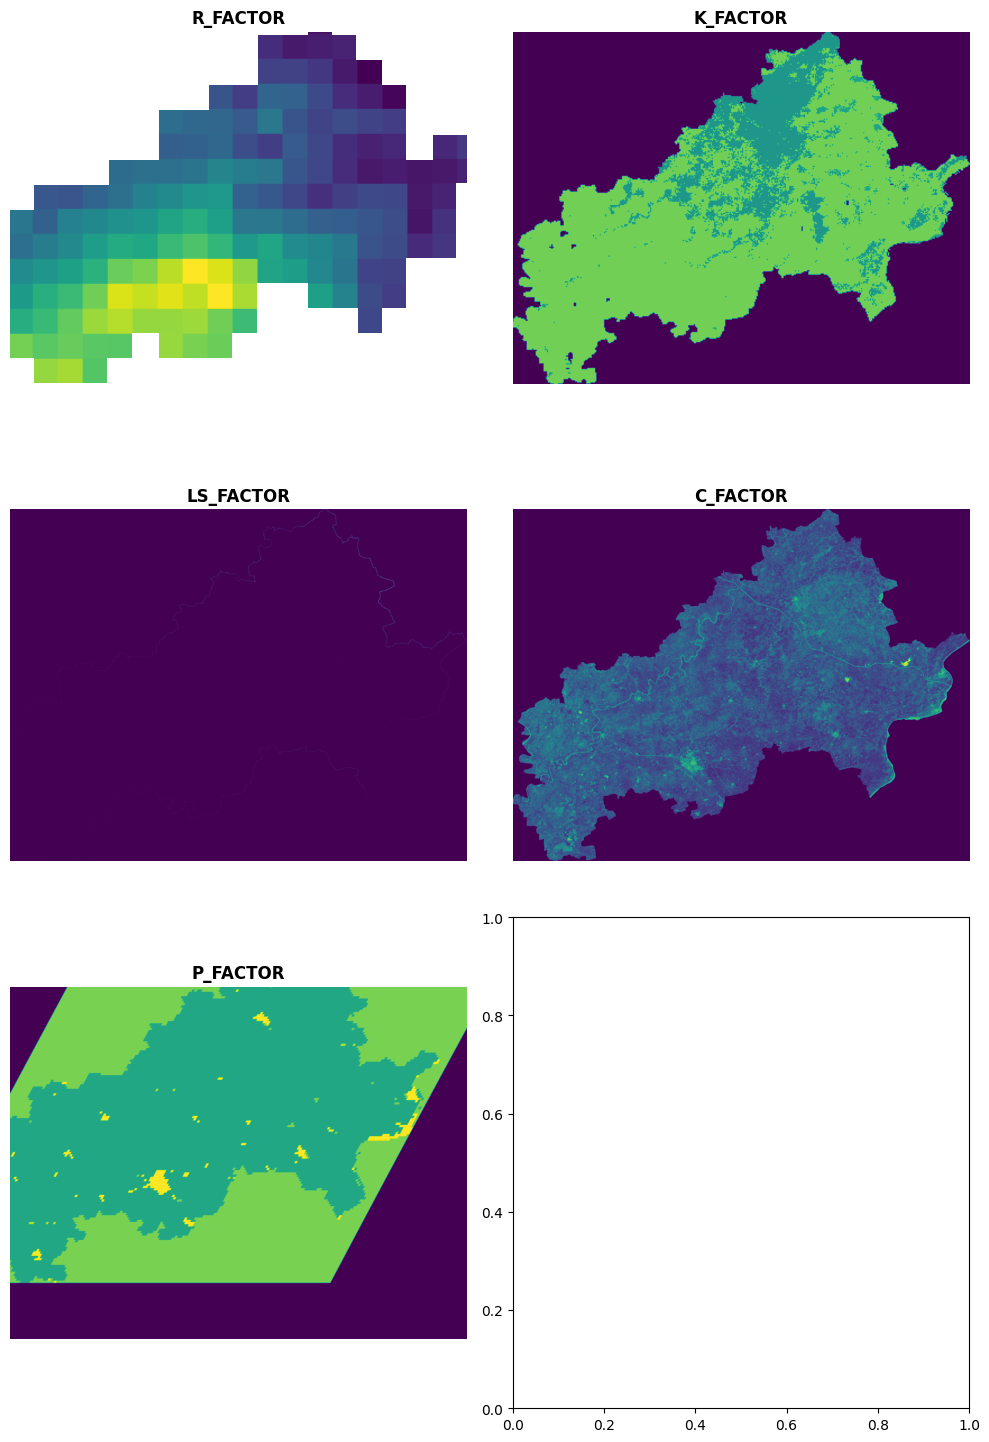

In [ ]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

# List of paths to resampled TIFF files
file_paths = [
    r'/content/gdrive/MyDrive/rusle1/R_FACTOR_RES.tif',
    r'/content/gdrive/MyDrive/rusle1/K_FACTOR_RES.tif',
    r'/content/gdrive/MyDrive/rusle1/LS_FACTOR_RES.tif',
    r'/content/gdrive/MyDrive/rusle1/C_FACTOR_RES.tif',
    r'/content/gdrive/MyDrive/rusle1/P_FACTOR_RES.tif',

]

# Function to visualize raster files
def visualize_rasters(file_paths, titles, num_cols=2):
    num_files = len(file_paths)
    num_rows = (num_files + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

    for i, (file_path, title) in enumerate(zip(file_paths, titles)):
        row, col = divmod(i, num_cols)
        with rasterio.open(file_path) as ds:
            show(ds, ax=axes[row, col], title=title)
            axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Titles for each raster file (adjust as needed)
titles = ['R_FACTOR', 'K_FACTOR', 'LS_FACTOR', 'C_FACTOR', 'P_FACTOR']

# Visualize the raster files with an adjusted layout
visualize_rasters(file_paths, titles, num_cols=2)


In [ ]:
### EXTRA  ####
### TO FIND MIN , MAX VALUE OF ANY RATSER IMAGE



# import rasterio
# import numpy as np

# # Assuming the raster file is already in the Colab environment
# # Replace 'your_raster.tif' with the path to your raster file
# raster_file_path = r'Your_RASTER_IMAGE_PATH'

# # Open the raster file
# with rasterio.open(raster_file_path) as src:
#     # Read the raster data for the entire image
#     raster_data = src.read()

#     # Mask out the 'NaN' values
#     masked_data = np.ma.masked_invalid(raster_data)

#     # Calculate the min and max value, ignoring 'NaN' values
#     min_value = masked_data.min()
#     max_value = masked_data.max()

# min_value, max_value
